**Exercise 2**

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.7.0


In [ ]:
#Load the fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
#Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels),(testing_images, testing_labels) = fmnist.load_data()

Label: 9

Image Pixel Array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

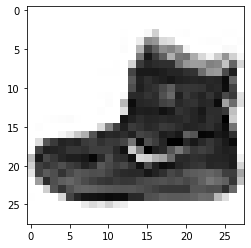

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#you can put between 0 and 59999 here
index = 0

#set the number of characters per row when printing
np.set_printoptions(linewidth = 320)

#print the label and image
print(f'Label: {training_labels[index]}')
print(f'\nImage Pixel Array:\n {training_images[index]}')

#visualizing the image
plt.imshow(training_images[index], cmap='Greys')

In [ ]:
#Normalize the pixel values of the train and test image
training_images= training_images/255.0
testing_images= testing_images/255.0

We can increase the 128 Neurons to 1024 and get more accuracy but that doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!


In [ ]:
#Define the layers of model
L0 = tf.keras.layers.Flatten() #shape of data
L1 = tf.keras.layers.Dense(128, activation=tf.nn.relu) #detect the rule between L0 and L2
L2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax) #shape of classes

In [ ]:
#Building the Classification model
model = tf.keras.models.Sequential([L0,L1,L2])

In [ ]:
classifications = model.predict(testing_images)

print(classifications[0])
print(testing_labels[0])

[0.07253999 0.12997307 0.14616641 0.0998766  0.06782526 0.19739126 0.08053999 0.05784196 0.0831027  0.06474283]
9


In [ ]:
#Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

#Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

#Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

#Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
#Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#Using callbacks to stop training when it reaches a specific value for some metric
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.95): # Experiment with changing this value
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True


In [ ]:
#Fit/train the model
callbacks = myCallback()
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3156 - accuracy: 0.8844
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2961 - accuracy: 0.8905
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2811 - accuracy: 0.8951
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2688 - accuracy: 0.9016
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2589 - accuracy: 0.9034
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2485 - accuracy: 0.9075
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2395 - accuracy: 0.9107
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2310 - accuracy: 0.9138
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2243 - accuracy: 0.9168
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.217

In [ ]:
#Evaluate the model on unseen data
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4304 - accuracy: 0.8867


[0.43043145537376404, 0.8866999745368958]